## Preparation

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import helpers as visualization
import tqdm as tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Names of the columns according to the describtion on the data description.
# Tried to make it as: Location_Bodypart_(angle)
# Maybe needs to be changed if there is something we have to think about
column_names = []
bodyparts = ["Nose","Neck","R_Shoulder","R_Elbow","R_Wrist","L_Shoulder","L_Elbow","L_Wrist","Mid_Hip","R_Hip","R_Knee","R_Ankle","L_Hip","L_Knee","L_Ankle","R_Eye","L_Eye","R_Ear","L_Ear","L_BigToe","L_SmallToe","L_Heel","R_BigToe","R_SmallToe","R_Heel"]
for bodypart in bodyparts:
    column_names.append(bodypart + "_coord_x")
    column_names.append(bodypart + "_coord_y")
    column_names.append(bodypart + "_confidence")


column_names.append("R_Elbow_Angle")
column_names.append("R_Armpit_Angle")
column_names.append("L_Elbow_Angle")
column_names.append("L_Armpit_Angle")
column_names.append("Label")

print(column_names)
print(len(column_names))


## Data exploration

In [3]:
# Create filelist for all files in the train folder
path = "Dataset/train/"
filelist_train = [csv for csv in os.listdir(path) if csv[-4:] == ".csv"]
len(filelist_train)

1167

In [ ]:
# concat all frames
dataset_train = pd.DataFrame()

for csv in filelist_train: # only the first 5 files for testing

    label = csv.split("_")[1].split(".")[0]     # get the label from the filename

    dataset_temp = pd.read_csv(path + csv, names = range(0, 79))

    dataset_temp["Label"] = label   # add a new column to the dataframe, and assign the label to it

    dataset_train = pd.concat([dataset_train, dataset_temp])

In [5]:
dataset_train.shape

(653422, 80)

In [63]:
dataset_train.columns = column_names
dataset_train.head()

,Nose_coord_x,Nose_coord_y,Nose_confidence,Neck_coord_x,Neck_coord_y,Neck_confidence,R_Shoulder_coord_x,R_Shoulder_coord_y,R_Shoulder_confidence,R_Elbow_coord_x,...,R_SmallToe_coord_y,R_SmallToe_confidence,R_Heel_coord_x,R_Heel_coord_y,R_Heel_confidence,R_Elbow_Angle,R_Armpit_Angle,L_Elbow_Angle,L_Armpit_Angle,Label
0,267.730682,117.018677,0.895402,279.800842,185.387146,0.895754,209.508896,199.382751,0.793637,183.428574,...,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,rowing
1,267.000000,118.000000,1.000000,279.000000,186.000000,1.000000,209.000000,201.000000,1.000000,183.000000,...,-0.021049,0.0,-0.363440,-0.021049,0.0,NaN,NaN,NaN,NaN,rowing
2,266.000000,119.000000,1.000000,278.000000,187.000000,1.000000,209.000000,202.000000,1.000000,184.000000,...,0.001790,0.0,-0.182489,0.001790,0.0,NaN,NaN,NaN,NaN,rowing
3,265.000000,120.000000,1.000000,277.000000,188.000000,1.000000,209.000000,203.000000,1.000000,184.000000,...,0.006548,0.0,-0.118099,0.006548,0.0,NaN,NaN,NaN,NaN,rowing
4,265.000000,121.000000,1.000000,277.000000,189.000000,1.000000,210.000000,202.000000,1.000000,184.000000,...,0.012986,0.0,-0.110839,0.012986,0.0,NaN,NaN,NaN,NaN,rowing


### Check how data is distributed

In [7]:
# check if acutal values for the angles exist
dataset_frames_elbow_angle = dataset_train["L_Elbow_Angle"].value_counts()
dataset_frames_armpit_angle = dataset_train["L_Armpit_Angle"].value_counts()
print("No. values in R_Elbow_Angle angles: " + str(dataset_train["R_Elbow_Angle"].count()))
print("No. values in R_Armpit_Angle angles: " + str(dataset_train["R_Armpit_Angle"].count()))
print("No. values in L_Elbow_Angle angles: " + str(sum(dataset_frames_elbow_angle)))
print("No. values in L_Armpit_Angle angles: " + str(sum(dataset_frames_armpit_angle)))
# Note: only in every second one.

No. values in R_Elbow_Angle angles: 326711
No. values in R_Armpit_Angle angles: 326711
No. values in L_Elbow_Angle angles: 326711
No. values in L_Armpit_Angle angles: 326711


In [24]:
condition = dataset_train["L_Knee_coord_y"] > 100
samples_with_legs = dataset_train[condition]["Label"]
condition = dataset_train["L_Heel_coord_x"].round() > 50
samples_with_feet = dataset_train[condition]["Label"]
dataset_frames_armpit_angle = dataset_train[dataset_train["L_Armpit_Angle"].notnull()]["Label"]
dataset_frames_armpit_angle = dataset_frames_armpit_angle.value_counts()

In [10]:
dataset_frames_overall = dataset_train["Label"].value_counts()

In [11]:
dataset_frames_overall

rowing    145346
violin    134624
drums     128246
boxing    126106
guitar    119100
Name: Label, dtype: int64

In [12]:
dataset_frames_legs = samples_with_legs.value_counts()
dataset_frames_legs

rowing    67670
drums     62864
boxing    61120
guitar    43660
violin    32604
Name: Label, dtype: int64

In [13]:
dataset_frames_feet = samples_with_feet.value_counts()
dataset_frames_feet

boxing    5872
violin    2540
rowing    2060
drums     1368
guitar     232
Name: Label, dtype: int64

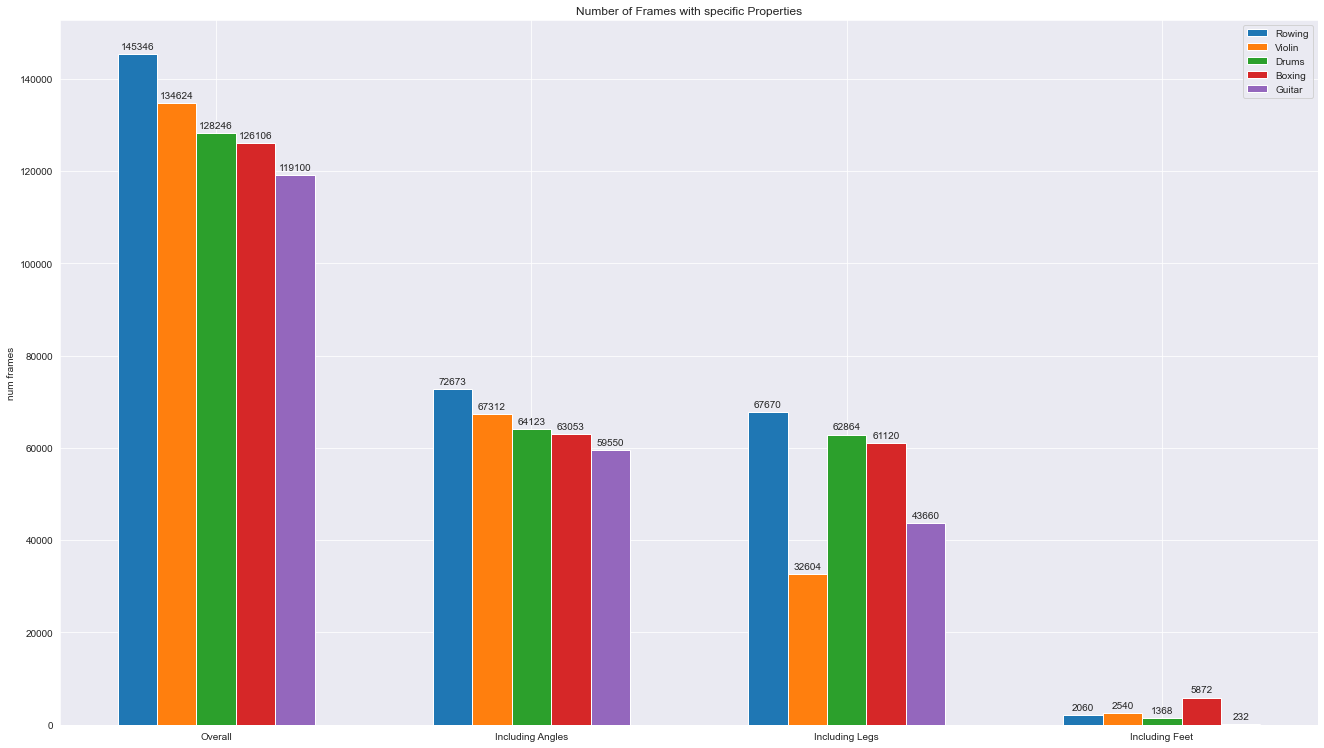

In [54]:
labels = ['Overall', 'Including Angles', 'Including Legs', 'Including Feet']
dataset_frames_rowing = [dataset_frames_overall.loc["rowing"], dataset_frames_armpit_angle.loc["rowing"],dataset_frames_legs.loc["rowing"], dataset_frames_feet.loc["rowing"]]
dataset_frames_violin = [dataset_frames_overall.loc["violin"], dataset_frames_armpit_angle.loc["violin"],dataset_frames_legs.loc["violin"], dataset_frames_feet.loc["violin"]]
dataset_frames_drums = [dataset_frames_overall.loc["drums"], dataset_frames_armpit_angle.loc["drums"],dataset_frames_legs.loc["drums"], dataset_frames_feet.loc["drums"]]
dataset_frames_boxing = [dataset_frames_overall.loc["boxing"], dataset_frames_armpit_angle.loc["boxing"],dataset_frames_legs.loc["boxing"], dataset_frames_feet.loc["boxing"]]
dataset_frames_guitar = [dataset_frames_overall.loc["guitar"], dataset_frames_armpit_angle.loc["guitar"],dataset_frames_legs.loc["guitar"], dataset_frames_feet.loc["guitar"]]

x = np.array([0.0, 4.0, 8.0, 12.0]) #np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width * 2, dataset_frames_rowing, width, label='Rowing')
rects2 = ax.bar(x - width, dataset_frames_violin, width, label='Violin')
rects3 = ax.bar(x, dataset_frames_drums, width, label='Drums')
rects4 = ax.bar(x + width, dataset_frames_boxing, width, label='Boxing')
rects5 = ax.bar(x + width * 2, dataset_frames_guitar, width, label='Guitar')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('num frames')
ax.set_title('Number of Frames with specific Properties')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)

fig.tight_layout()

plt.show()

In [62]:
all = dataset_frames_overall.sum()
angles = int(dataset_frames_armpit_angle.sum() / all * 1000) / 10
legs = int(dataset_frames_legs.sum() / all * 1000) / 10
feet = int(dataset_frames_feet.sum() / all * 1000) / 10
print("Overall frames: ", all, "\nPercentage with angles: ", angles, "%\nPercentage with legs: ", legs, "%\nPercentage with feet: ", feet, "%")

Overall frames:  653422 
Percentage with angles:  50.0 %
Percentage with legs:  41.0 %
Percentage with feet:  1.8 %


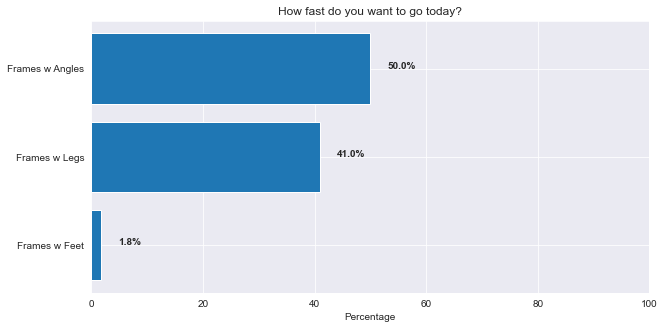

In [76]:
# Example data
labels = ('Frames w Angles', 'Frames w Legs', 'Frames w Feet')
y_pos = np.arange(len(labels))
percentage = [angles, legs, feet]
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.barh(y_pos, percentage, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_xlim([0, 100])

for i, v in enumerate(percentage):
    ax.text(v + 3, i, str(v) + "%", fontweight='bold')

plt.show()

## Visualize Training Data

In [77]:
# Test with a single file
df_boxing = pd.read_csv("Dataset/train/10198371_boxing.csv", names = range(0, 79))
df_drums = pd.read_csv("Dataset/train/11063337_drums.csv", names = range(0, 79))
df_guitar = pd.read_csv("Dataset/train/10153922_guitar.csv", names = range(0, 79))
df_rowing = pd.read_csv("Dataset/train/10143855_rowing.csv", names = range(0, 79))
df_violin = pd.read_csv("Dataset/train/10239151_violin.csv", names = range(0, 79))


# df.shape

In [ ]:
# dummy pose for testing
for i, row in df_boxing.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/boxing/" + str(i), tolerance=25)
visualization.save_as_gif(input_folder="./images/boxing/*", output_folder="./images/boxing/boxing.gif")

In [ ]:
for i, row in df_drums.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/drums/" + str(i), tolerance=25)
visualization.save_as_gif(input_folder="./images/drums/*", output_folder="./images/drums/drumming.gif")

In [80]:
for i, row in df_guitar.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/guitar/" + str(i), tolerance=25)
    break
#visualization.save_as_gif(input_folder="./images/guitar/*", output_folder="./images/guitar/guitarring.gif")

In [ ]:
for i, row in df_rowing.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/rowing/" + str(i), tolerance=25)
visualization.save_as_gif(input_folder="./images/rowing/*", output_folder="./images/rowing/rowing.gif")

In [ ]:
for i, row in df_violin.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/violin/" + str(i), tolerance=25)
visualization.save_as_gif(input_folder="./images/violin/*", output_folder="./images/violin/violinning.gif")

#### boxing
<img src="./images/boxing/boxing.gif" width="500"/>

#### drumming
<img src="./images/drums/drumming.gif" width="500"/>

#### guitar
<img src="./images/guitar/guitarring.gif" width="500"/>

#### rowing
<img src="./images/rowing/rowing.gif" width="500"/>

#### violin
<img src="./images/violin/violinning.gif" width="500"/>

## Visualizing Test data

In [ ]:
df_test = pd.read_csv("Dataset/test/0.csv", names = range(0, 79))

for i, row in df_test.iterrows():
    visualization.plot_pose(row, bodyparts, save=True, title="/test0/" + str(i), tolerance=25)
visualization.save_as_gif(input_folder="./images/test0/*", output_folder="./images/test0/test0.gif")

#### Test data
<img src="./images/test0.gif" width="500"/>

## Visualize Dataset

#### Prepare

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# set columnnames
column_names = ['Nose_coord_x', 'Nose_coord_y', 'Nose_confidence', 'Neck_coord_x',
       'Neck_coord_y', 'Neck_confidence', 'R_Shoulder_coord_x',
       'R_Shoulder_coord_y', 'R_Shoulder_confidence', 'R_Elbow_coord_x',
       'R_Elbow_coord_y', 'R_Elbow_confidence', 'R_Wrist_coord_x',
       'R_Wrist_coord_y', 'R_Wrist_confidence', 'L_Shoulder_coord_x',
       'L_Shoulder_coord_y', 'L_Shoulder_confidence', 'L_Elbow_coord_x',
       'L_Elbow_coord_y', 'L_Elbow_confidence', 'L_Wrist_coord_x',
       'L_Wrist_coord_y', 'L_Wrist_confidence', 'Mid_Hip_coord_x',
       'Mid_Hip_coord_y', 'Mid_Hip_confidence', 'R_Hip_coord_x',
       'R_Hip_coord_y', 'R_Hip_confidence', 'R_Knee_coord_x', 'R_Knee_coord_y',
       'R_Knee_confidence', 'R_Ankle_coord_x', 'R_Ankle_coord_y',
       'R_Ankle_confidence', 'L_Hip_coord_x', 'L_Hip_coord_y',
       'L_Hip_confidence', 'L_Knee_coord_x', 'L_Knee_coord_y',
       'L_Knee_confidence', 'L_Ankle_coord_x', 'L_Ankle_coord_y',
       'L_Ankle_confidence', 'R_Eye_coord_x', 'R_Eye_coord_y',
       'R_Eye_confidence', 'L_Eye_coord_x', 'L_Eye_coord_y',
       'L_Eye_confidence', 'R_Ear_coord_x', 'R_Ear_coord_y',
       'R_Ear_confidence', 'L_Ear_coord_x', 'L_Ear_coord_y',
       'L_Ear_confidence', 'L_BigToe_coord_x', 'L_BigToe_coord_y',
       'L_BigToe_confidence', 'L_SmallToe_coord_x', 'L_SmallToe_coord_y',
       'L_SmallToe_confidence', 'L_Heel_coord_x', 'L_Heel_coord_y',
       'L_Heel_confidence', 'R_BigToe_coord_x', 'R_BigToe_coord_y',
       'R_BigToe_confidence', 'R_SmallToe_coord_x', 'R_SmallToe_coord_y',
       'R_SmallToe_confidence', 'R_Heel_coord_x', 'R_Heel_coord_y',
       'R_Heel_confidence', 'R_Elbow_Angle', 'R_Armpit_Angle', 'L_Elbow_Angle',
       'L_Armpit_Angle', 'R_Shoulder_Angle', 'R_Hip_Angle', 'L_Shoulder_Angle',
       'L_Hip_Angle', 'Head_Angle', 'Shoulder_Distance', 'Hip_Distance',
       'Eye_Distance', 'Label']

In [ ]:
# Create filelist for all files in the train folder
path = "/content/gdrive/MyDrive/Colab Notebooks/train_added_angles/"
filelist_train = [csv for csv in os.listdir(path) if csv[-4:] == ".csv"]
filelist_train = filelist_train
print("files: " + str(len(filelist_train)))

dataset_train = pd.DataFrame()

for csv in tqdm.tqdm(filelist_train):
    filepath = path + csv
    dataset_temp = pd.read_csv(filepath, header=None)

    dataset_train = dataset_train.append(dataset_temp)

print("dataset shape: " + str(dataset_train.shape))
dataset_train.columns = column_names


In [ ]:
dataset_train.head()

,Nose_coord_x,Nose_coord_y,Nose_confidence,Neck_coord_x,Neck_coord_y,Neck_confidence,R_Shoulder_coord_x,R_Shoulder_coord_y,R_Shoulder_confidence,R_Elbow_coord_x,...,L_Armpit_Angle,R_Shoulder_Angle,R_Hip_Angle,L_Shoulder_Angle,L_Hip_Angle,Head_Angle,Shoulder_Distance,Hip_Distance,Eye_Distance,Label
0,346.15744,66.764488,0.882447,346.105255,161.265305,0.847082,269.80011,155.281616,0.754676,221.558716,...,111.700325,93.949680,92.629368,87.556724,91.670823,85.547802,153.030972,106.506443,32.162409,boxing
1,347.00000,67.000000,1.000000,346.000000,161.000000,1.000000,270.00000,154.000000,1.000000,222.000000,...,111.882758,95.262395,92.045408,87.739498,92.337306,85.347111,152.328592,105.000000,32.000000,boxing
2,347.00000,67.000000,1.000000,346.000000,158.000000,1.000000,271.00000,153.000000,1.000000,221.000000,...,112.956632,94.339709,90.462126,86.421483,93.015188,86.815524,150.269757,104.004808,32.015621,boxing
3,347.00000,67.000000,1.000000,346.000000,158.000000,1.000000,272.00000,151.000000,1.000000,221.000000,...,112.381528,96.195848,90.178965,87.659785,93.281610,85.225807,148.273396,105.004762,32.015621,boxing
4,347.00000,67.000000,1.000000,345.000000,156.000000,1.000000,275.00000,151.000000,1.000000,222.000000,...,111.351769,95.136798,91.961607,88.153096,93.487829,87.201712,142.126704,104.004808,32.015621,boxing


#### PCA

In [ ]:
#prepare for pca
np.random.seed(42)

rndperm = np.random.permutation(dataset_train.shape[0])

# split data and labels
labels = dataset_train["Label"]
df = dataset_train.drop(["Label"],axis=1)
df = df.fillna(value=0)
#print(labels.head())
#print(df.head())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

print(pca.explained_variance_ratio_)

first_pc = pca_result[:, 0]
second_pc = pca_result[:, 1]
third_pc = pca_result[:, 2]

#### Two best Pricipal Components

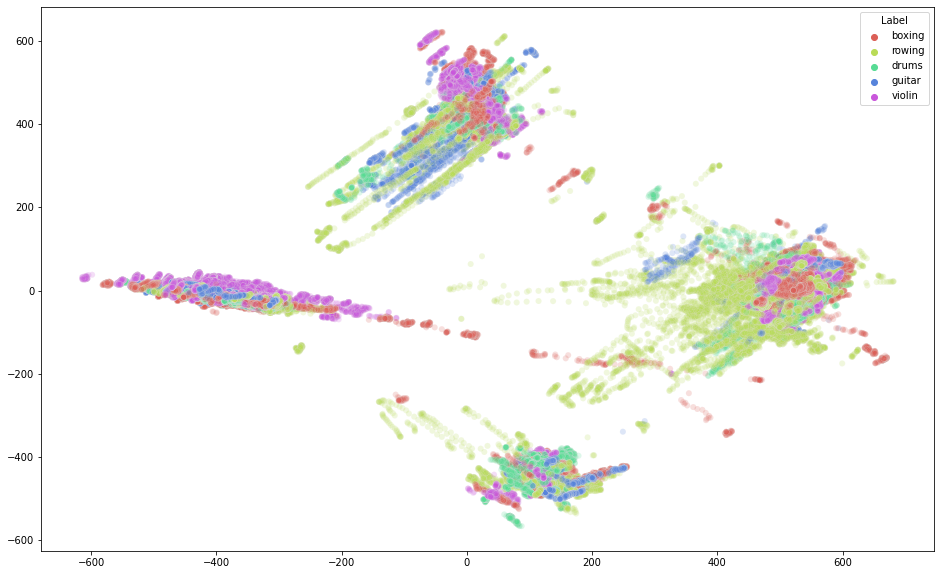

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_pc, y=second_pc,
    hue=labels,
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
    alpha=0.1
)

#### Three best Principal components

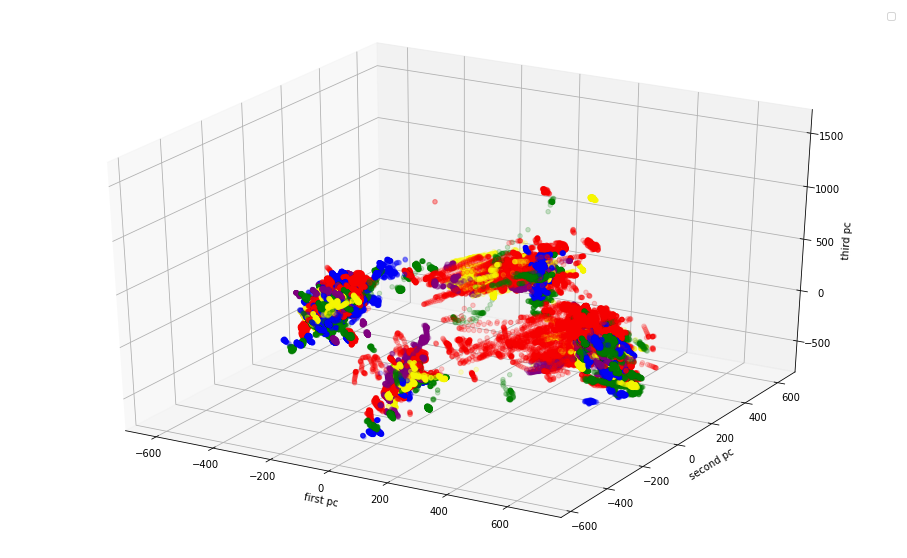

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
cdict = {"rowing": 'red', "guitar": 'yellow', "boxing": 'green', "violin" : "blue", "drums" : "purple" }
ax.scatter(
    xs=first_pc,
    ys=second_pc,
    zs=third_pc,
    c=labels.map(cdict),
    alpha=0.1
)
ax.set_xlabel('first pc')
ax.set_ylabel('second pc')
ax.set_zlabel('third pc')
plt.legend()
plt.show()

#### TSNE

##### TSNE with 2 components on 10000 samples

In [ ]:
subset_x = df[0:10000]
subset_y = labels[0:10000]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(subset_x)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 25.742170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.295563
[t-SNE] KL divergence after 300 iterations: 1.920851


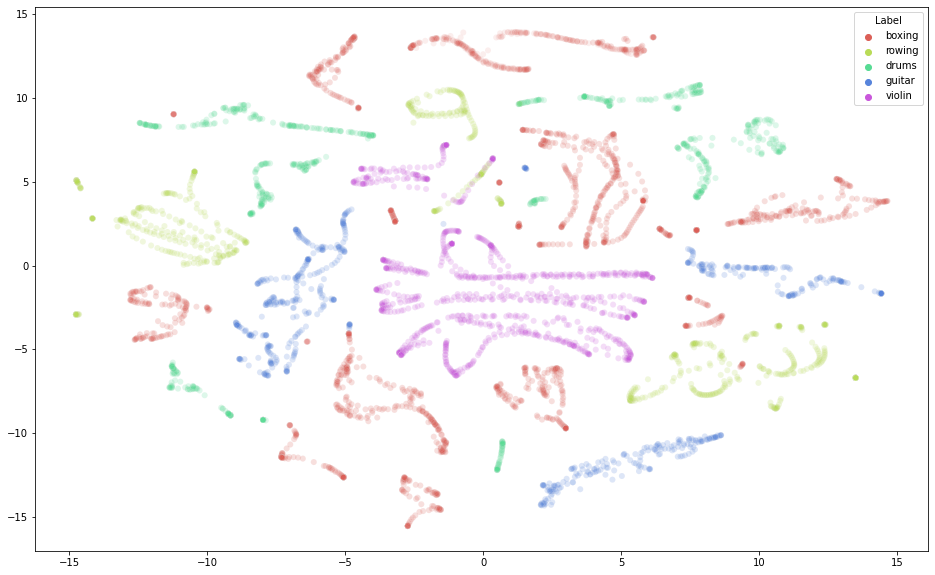

In [ ]:
first_tsne = tsne_results[:,0]
second_tsne = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_tsne, y=second_tsne,
    hue=subset_y,
    palette=sns.color_palette("hls", 5),
    data=subset_x,
    legend="full",
    alpha=0.1
)

##### TSNE with 2 components on 100000 samples

In [ ]:
subset_x = df[0:100000]
subset_y = labels[0:100000]

In [ ]:
# reduce number of dimensions by PCA as much as possible
for i in reversed(range(40)):
  pca = PCA(n_components=i)
  pca_result = pca.fit_transform(subset_x.values)

  if sum(pca.explained_variance_ratio_) < 0.99:
    break

print("no. components: " + str(i) + " explained var: " + str(sum(pca.explained_variance_ratio_)))

no. components: 16 explained var: 0.9877480565269832


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result)

first_tsne = tsne_pca_results[:,0]
second_tsne = tsne_pca_results[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.004s...
[t-SNE] Computed neighbors for 100000 samples in 81.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

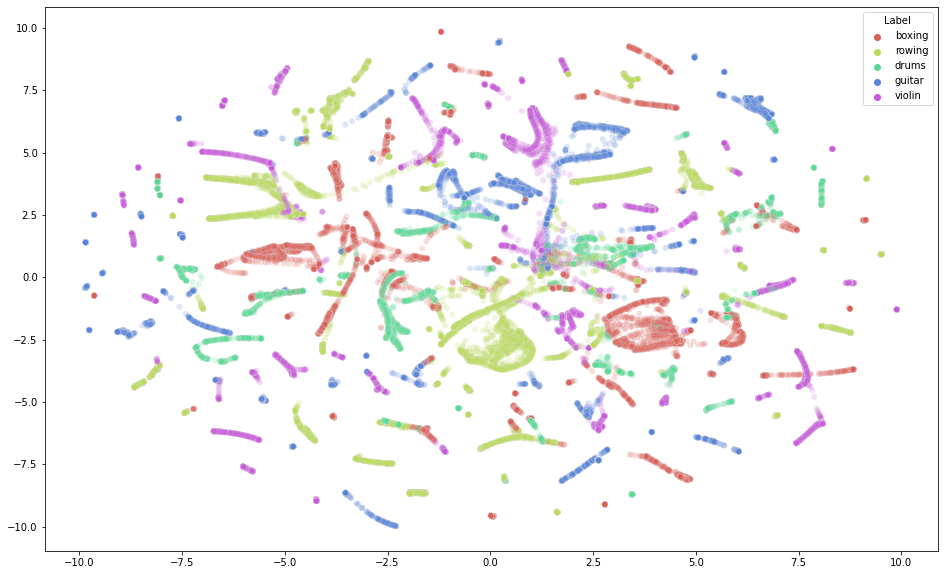

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_tsne, y=second_tsne,
    hue=subset_y,
    palette=sns.color_palette("hls", 5),
    data=subset_x,
    legend="full",
    alpha=0.1
)

In [ ]:
import pickle
pickle.dump(pca, open("pca_50.sav", "wb"))
pickle.dump(tsne, open("tsne.sav", "wb"))

##### TSNE with 3 components on 100000 samples dimensional reduced by PCA

In [ ]:
tsne_3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne_3.fit_transform(pca_result)

first_tsne = tsne_pca_results[:,0]
second_tsne = tsne_pca_results[:,1]
third_tsne = tsne_pca_results[:,2]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.004s...
[t-SNE] Computed neighbors for 100000 samples in 88.898s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

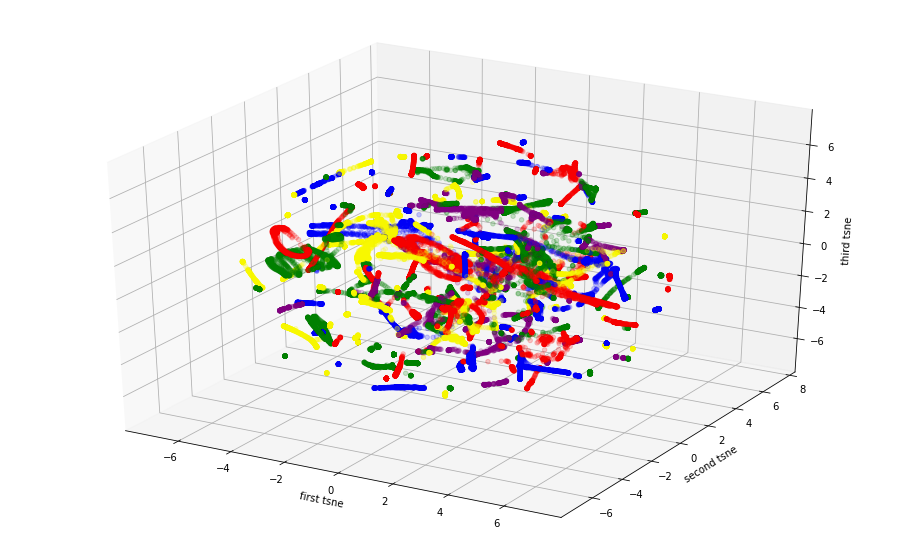

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
cdict = {"rowing": 'red', "guitar": 'yellow', "boxing": 'green', "violin" : "blue", "drums" : "purple" }
ax.scatter(
    xs=first_tsne,
    ys=second_tsne,
    zs=third_tsne,
    c=subset_y.map(cdict),
    alpha=0.1
)
ax.set_xlabel('first tsne')
ax.set_ylabel('second tsne')
ax.set_zlabel('third tsne')
plt.show()

In [ ]:
pickle.dump(tsne_3, open("tsne_3.sav", "wb"))